# Laplace Equation & Possion Equations

In this Lab, we will learn how to numerically solve Laplace and Possion equations, which are common equations in electromagnestism and gravitational problems. 

There should be two files under `./poisson_solver`.\
1. `mesh.py` handles the mesh grids we will used in this Lab.\
2. `solvers.py` handles all corresponding iterative solvers for Laplace/Poisson Equation. 

In [1]:
%reset -f

import numpy as np
import numba as na
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time as time
from poisson_solver.mesh import Mesh2D
from poisson_solver.solvers import *

## Exercise 4: Jacobi method

1. Test your Mesh2D class to see if you could generate the grids we need for this calculation
2. Implement the Jacobi meothd in `./poisson_solver/solver.py`.
3. Write a function called `updata_boundary()` to update the boundary conditions.\
   Where to put this `update_boundary()` function is up to you.\
   You could put it either inside the `Mesh2D` class, in `solvers.py`, or here.

## Exercise 5: Gauss-Seidel Meothd.

1. Implement the Gauss-Seidel meothd in your solver.
2. Repeat exercise 4. for the Gauss-Seidel meothd.
3. Compare the error convergence between Jacobi and Gauss-Seidel

In [2]:
def setup():
    tor       = 1e-7
    xmin, xmax = -5, 5
    ymin, ymax = -5, 5
    nx, ny    = 128, 128
    buff_size = 1
    
    mesh = Mesh2D(nx = nx, ny = ny, buff_size = buff_size)
    mesh.set_xmin(xmin)
    mesh.set_xmax(xmax)
    mesh.set_ymin(ymin)
    mesh.set_ymax(ymax)

    return tor, mesh

In [3]:
'''
Jacobi
'''
ini = setup()
t1 = time.time()
# name == Gauss or Jacobi or SOR
j_arr = solve("Jacobi", ini[0], ini[1])
j_u   = j_arr[0]
j_err = j_arr[1]
j_n   = j_arr[2]
j_N = np.linspace(0, int(j_n), int(j_n))
t2 = time.time()

'''
Gauss-Seidel
'''
ini = setup()
t3 = time.time()
# name == Gauss or Jacobi or SOR
g_arr = solve("Gauss", ini[0], ini[1])
g_u   = g_arr[0]
g_err = g_arr[1]
g_n   = g_arr[2]
g_N = np.linspace(0, int(g_n), int(g_n))
t4 = time.time()

'''
SOR
'''
ini = setup()
t5 = time.time()
# name == Gauss or Jacobi or SOR
w1, w2, w3 = 1.2, 1.5, 2.0

s1_arr = solve("SOR", ini[0], ini[1], w = w1)
s1_u   = s1_arr[0]
s1_err = s1_arr[1]
s1_n   = s1_arr[2]
s1_N = np.linspace(0, int(s1_n), int(s1_n))
# prune the margins
s1_u = np.delete(s1_u, (0, -1), 0)
s1_u = np.delete(s1_u, (0, -1), 1)

ini = setup()
s2_arr = solve("SOR", ini[0], ini[1], w = w2)
s2_u   = s2_arr[0]
s2_err = s2_arr[1]
s2_n   = s2_arr[2]
s2_N = np.linspace(0, int(s2_n), int(s2_n))
# prune the margins
s2_u = np.delete(s2_u, (0, -1), 0)
s2_u = np.delete(s2_u, (0, -1), 1)

ini = setup()
s3_arr = solve("SOR", ini[0], ini[1], w = w3)
s3_u   = s3_arr[0]
s3_err = s3_arr[1]
s3_n   = s3_arr[2]
s3_N = np.linspace(0, int(s3_n), int(s3_n))
# prune the margins
s3_u = np.delete(s3_u, (0, -1), 0)
s3_u = np.delete(s3_u, (0, -1), 1)
t6 = time.time()

print("Jocobi -> Time = ", np.round((t2-t1), 2))
print("Gauss -> Time = ", np.round((t4-t3), 2))
print("SOR -> Time = ", np.round((t6-t5), 2))
print("Done!")

Jocobi -> Time =  10.03
Gauss -> Time =  5.15
SOR -> Time =  40.75
Done!


### Visualize your results

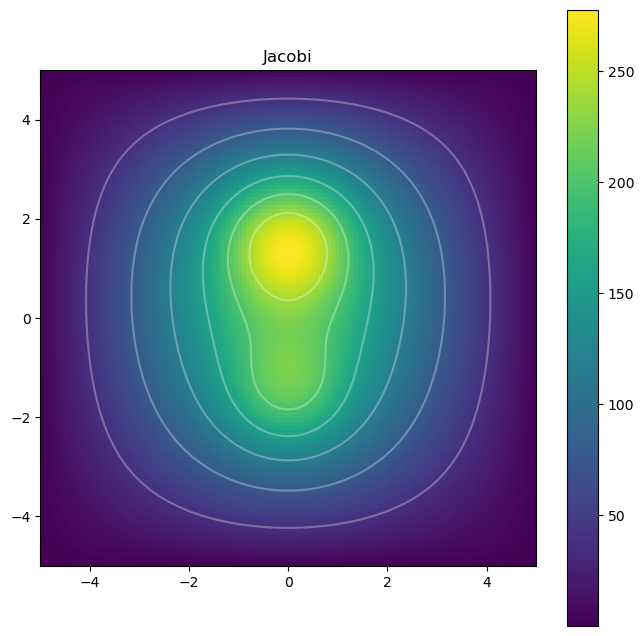

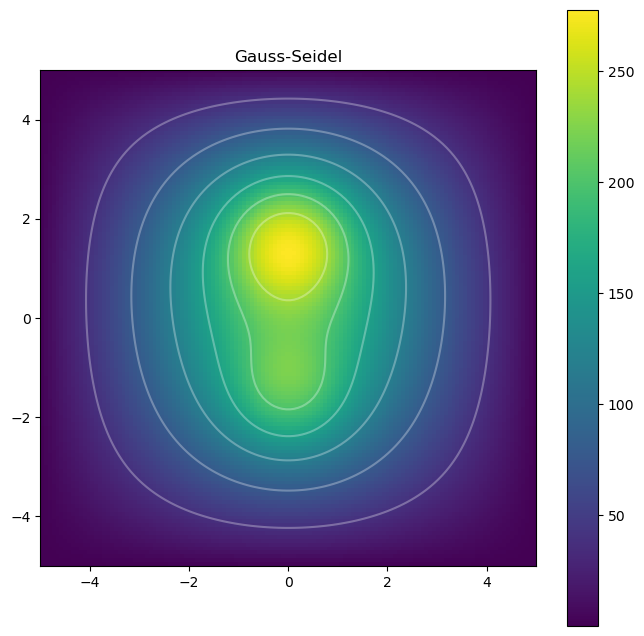

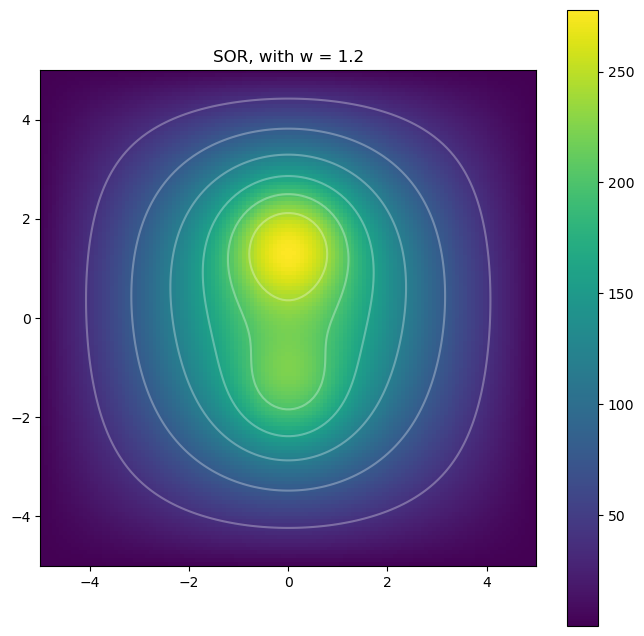

In [4]:
'''
Jacobi
'''
# prune the margins
j_u = np.delete(j_u, (0, -1), 0)
j_u = np.delete(j_u, (0, -1), 1)

figure(figsize=(8, 8), dpi=100)
plt.imshow(j_u, origin = 'lower', extent=[-5, 5, -5, 5])
plt.colorbar()
plt.contour(j_u, colors = 'w', alpha = .3, extent=[-5, 5, -5, 5])
plt.title("Jacobi")
plt.show()

'''
Gauss-Seidel
'''
# prune the margins
g_u = np.delete(g_u, (0, -1), 0)
g_u = np.delete(g_u, (0, -1), 1)

figure(figsize=(8, 8), dpi=100)
plt.imshow(g_u, origin = 'lower', extent=[-5, 5, -5, 5])
plt.colorbar()
plt.contour(g_u, colors = 'w', alpha = .3, extent=[-5, 5, -5, 5])
plt.title("Gauss-Seidel")
plt.show()

'''
SOR
'''
figure(figsize=(8, 8), dpi=100)
plt.imshow(s1_u, origin = 'lower', extent=[-5, 5, -5, 5])
plt.colorbar()
plt.contour(s1_u, colors = 'w', alpha = .3, extent=[-5, 5, -5, 5])
plt.title(f"SOR, with w = {w1}")
plt.show()

### Error convergence.

To see how it converge, we could make a of Error vs. Iteration times to see how it converges.

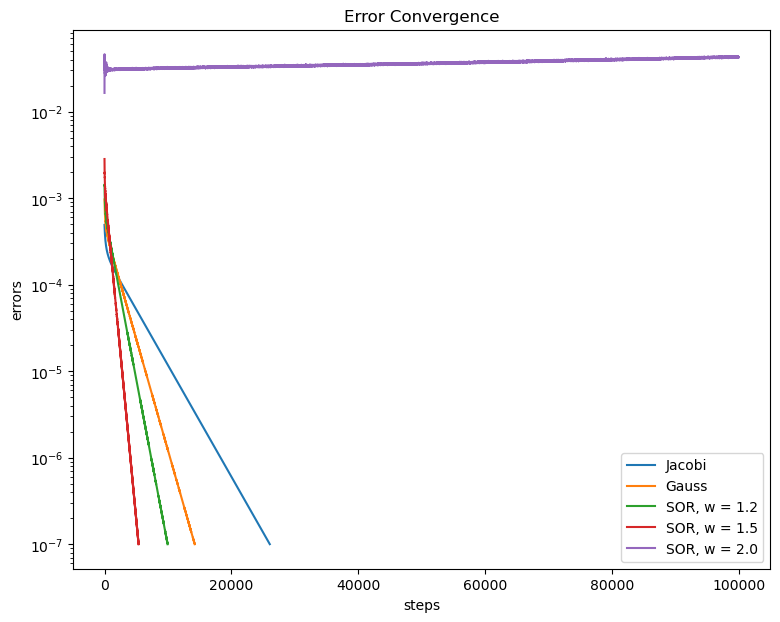

In [7]:
figure(figsize=(9, 7), dpi=100)
plt.yscale('log')
plt.plot(j_N, j_err, label = "Jacobi")
plt.plot(g_N, g_err, label = "Gauss")
plt.plot(s1_N, s1_err, label = f"SOR, w = {w1}")
plt.plot(s2_N, s2_err, label = f"SOR, w = {w2}")
plt.plot(s3_N, s3_err, label = f"SOR, w = {w3}")
plt.xlabel("steps")
plt.ylabel("errors")
plt.title("Error Convergence")
plt.legend(loc = 'best')